In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
train = pd.read_csv('../data/train_xy.csv')

In [4]:
test = pd.read_csv('../data/test_all.csv')

In [5]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [6]:
train.shape

(15000, 160)

In [7]:
test.head()

,cust_id,cust_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,1,group_1,0.291667,0.555388,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,2,2,2,3
1,2,group_3,0.270833,0.770302,0,0,0,0,1,1,...,1,1,1,1,1,1,2,2,1,10
2,3,group_3,0.354167,0.440327,0,0,0,0,4,3,...,1,1,1,1,1,1,1,1,3,3
3,4,group_1,0.208333,0.476509,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,4
4,5,group_1,0.125000,0.955286,0,0,0,0,2,1,...,1,1,1,1,1,1,1,1,1,10


In [8]:
x_train = train.drop(['cust_group','y','cust_id'],axis =1)

In [9]:
x_test = test.drop(['cust_group','cust_id'],axis=1)

In [10]:
x_train.shape

(15000, 157)

In [11]:
x_test.shape

(10000, 157)

In [12]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

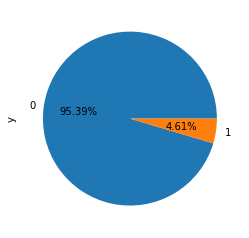

In [13]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [14]:
y_train = train['y']

In [15]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
    x = pd.concat([x, dummies_df], axis=1)

In [16]:
x.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_1561,x_1562,x_1563,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711
0,0.354167,0.604988,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,1,1,0,0,0,0,0,0
1,0.125000,0.012058,-99,-99,-99,-99,-99,-99,-99,-99,...,0,1,0,0,0,1,0,0,0,0
2,0.333333,0.565979,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.208333,0.316209,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.208333,0.008061,-99,-99,-99,-99,-99,-99,0,1,...,0,1,0,0,1,0,0,0,0,0


In [17]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 355)
(10000, 355)


In [19]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
X_train,X_val,y_train,y_val= train_test_split(train_X,y_train,test_size=0.2,random_state=2)

In [37]:
cls = LogisticRegression(C=0.01).fit(X_train, y_train)

In [38]:
predictions = cls.predict_proba(X_val)
pre = predictions[:,1]
val_auc = metrics.roc_auc_score(y_val,pre)#验证集上的auc值
print(val_auc)

0.7824007175245404


In [40]:
preds = cls.predict_proba(test_X)
pred = preds[:,1]
pred.shape

(10000,)

In [42]:
Submission = pd.DataFrame({'cust_id': test['cust_id'], 'pred_prob': pred})
Submission.to_csv('../result/Submission15.csv',index=False)